# Clustering Assignment

In [1]:
import warnings 

warnings.filterwarnings("ignore")

In [2]:
# Importing the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


## 1. Reading and Understanding the given data 

In [3]:
# Reading the Country-data.csv file into the notebook
df=pd.read_csv("Country-data.csv") 
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Checking the shape of the dataframe 
df.shape

(167, 10)

Thus we see that the dataframe has 167 rows and 10 columns 

In [5]:
# Looking into the statistical summary of the data 
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


From the observation of the above summary we can see that outliers exist in almost all columns, we will look into each of them separately at a later stage. 

In [6]:
# Looking into the details of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Thus we can see that there are no columns with null values and the data type of each columm is also appropriate.

From the data dictionary given it can be understood that the columns exports,health and imports have been given as percentages of gdpp. These need to be converted to proper values for better analysis.

In [7]:
# Conversion of values in columns 'exports', 'health' and 'imports' to their oroginal values 
df['exports']= (df['exports']*df['gdpp'])/100 
df['health']= (df['health']*df['gdpp'])/100 
df['imports']= (df['imports']*df['gdpp'])/100  

#Checking if the changes have been made 
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


From the dataframe above we can understand that the required changes have been made. 

## 2. EDA and Outlier Treatment

### Univariate Analysis 


In [8]:
# Preparing for performing univariate analysis on numerical columns 
df_numerical=df.select_dtypes(include=['float64','int64']) 
df_numerical.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

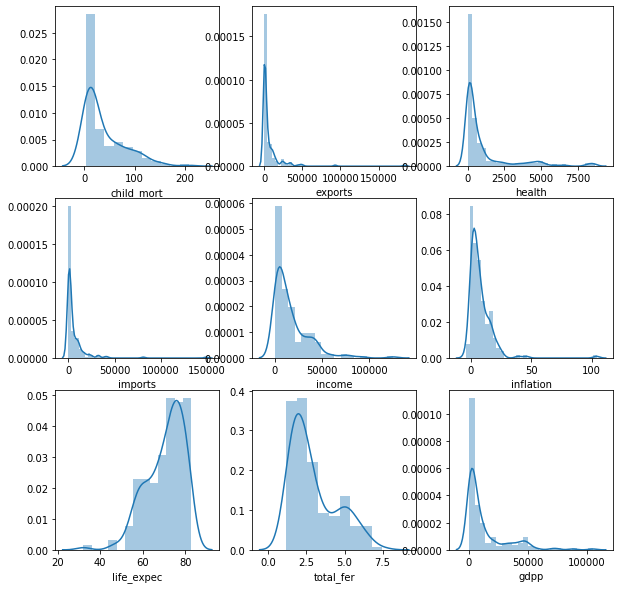

In [9]:
# Plotting Distrubution plots for numerical columns 
plt.figure(figsize = (10,10))
f = df_numerical.columns
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

- From the distribution plots it can be seen that there are higher number of countries which have lower gdpp,exports, child mortality rates, income, inflation, imports. While in the case of life expectancy, more countries seem to have higher life expectancies.   
- All columns except life_expec and total_fer seem to have normal distribution. 

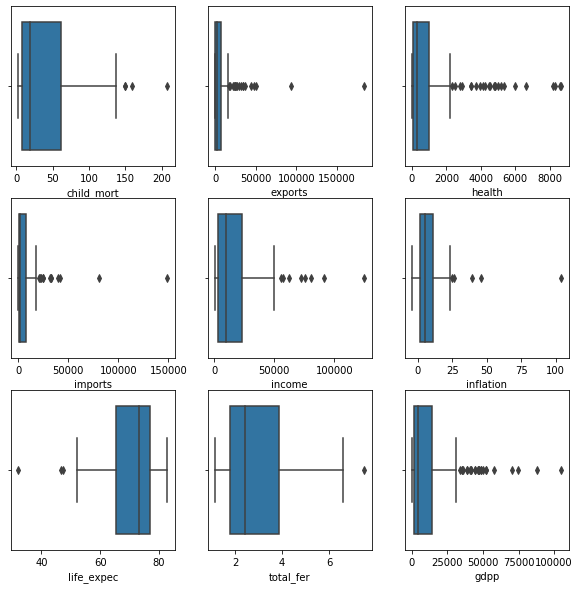

In [10]:
# Plotting boxplots for numerical columns  
plt.figure(figsize = (10,10))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df)

The boxplots of the numerical columns reveal quite a lot of outliers, proving what was observed during understanding the statistical summary of the data.  
- The columns child_mort,exports, health, imports, income, inflation,total_fer and gdpp have outliers in the higher end. 
- The column life_expec has outliers in the lower end. 

Plan for treatment of the outliers 
By taking into consideration the objective of this case study which is to identify the countries in urgent need of aid, we follow the following plan for treatment of outliers. 
- We do not treat the upper end outliers of the columns total_fer, child_mort and inflation because higher fertility, child mortality and inflation rates are characteristic to countries that need aid and hence its important that these points are left as such for our study. 
- Once again its the poorer countries that require aid that have lower life expectancies, so for the column life_expec which has outliers in the lower end, we leave them as such. 
- For the rest of the columns we do soft capping for the upper end outliers because these indicate countries that most likely do not need aid.

In [11]:
# Outlier Treatment 
# Soft Capping for the columns 'exports','health','imports', 'income' and 'gdpp'
q1 = df['exports'].quantile(0.00)
q4 = df['exports'].quantile(0.99)
df['exports'][df['exports']<=q1] = q1
df['exports'][df['exports']>=q4] = q4 

q1 = df['imports'].quantile(0.00)
q4 = df['imports'].quantile(0.99)
df['imports'][df['imports']<=q1] = q1
df['imports'][df['imports']>=q4] = q4

q1 = df['health'].quantile(0.00)
q4 = df['health'].quantile(0.99)
df['health'][df['health']<=q1] = q1
df['health'][df['health']>=q4] = q4 

q1 = df['income'].quantile(0.00)
q4 = df['income'].quantile(0.99)
df['income'][df['income']<=q1] = q1
df['income'][df['income']>=q4] = q4 

q1 = df['gdpp'].quantile(0.00)
q4 = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp']<=q1] = q1
df['gdpp'][df['gdpp']>=q4] = q4


### Bivariate Analysis 

<Figure size 1440x1440 with 0 Axes>

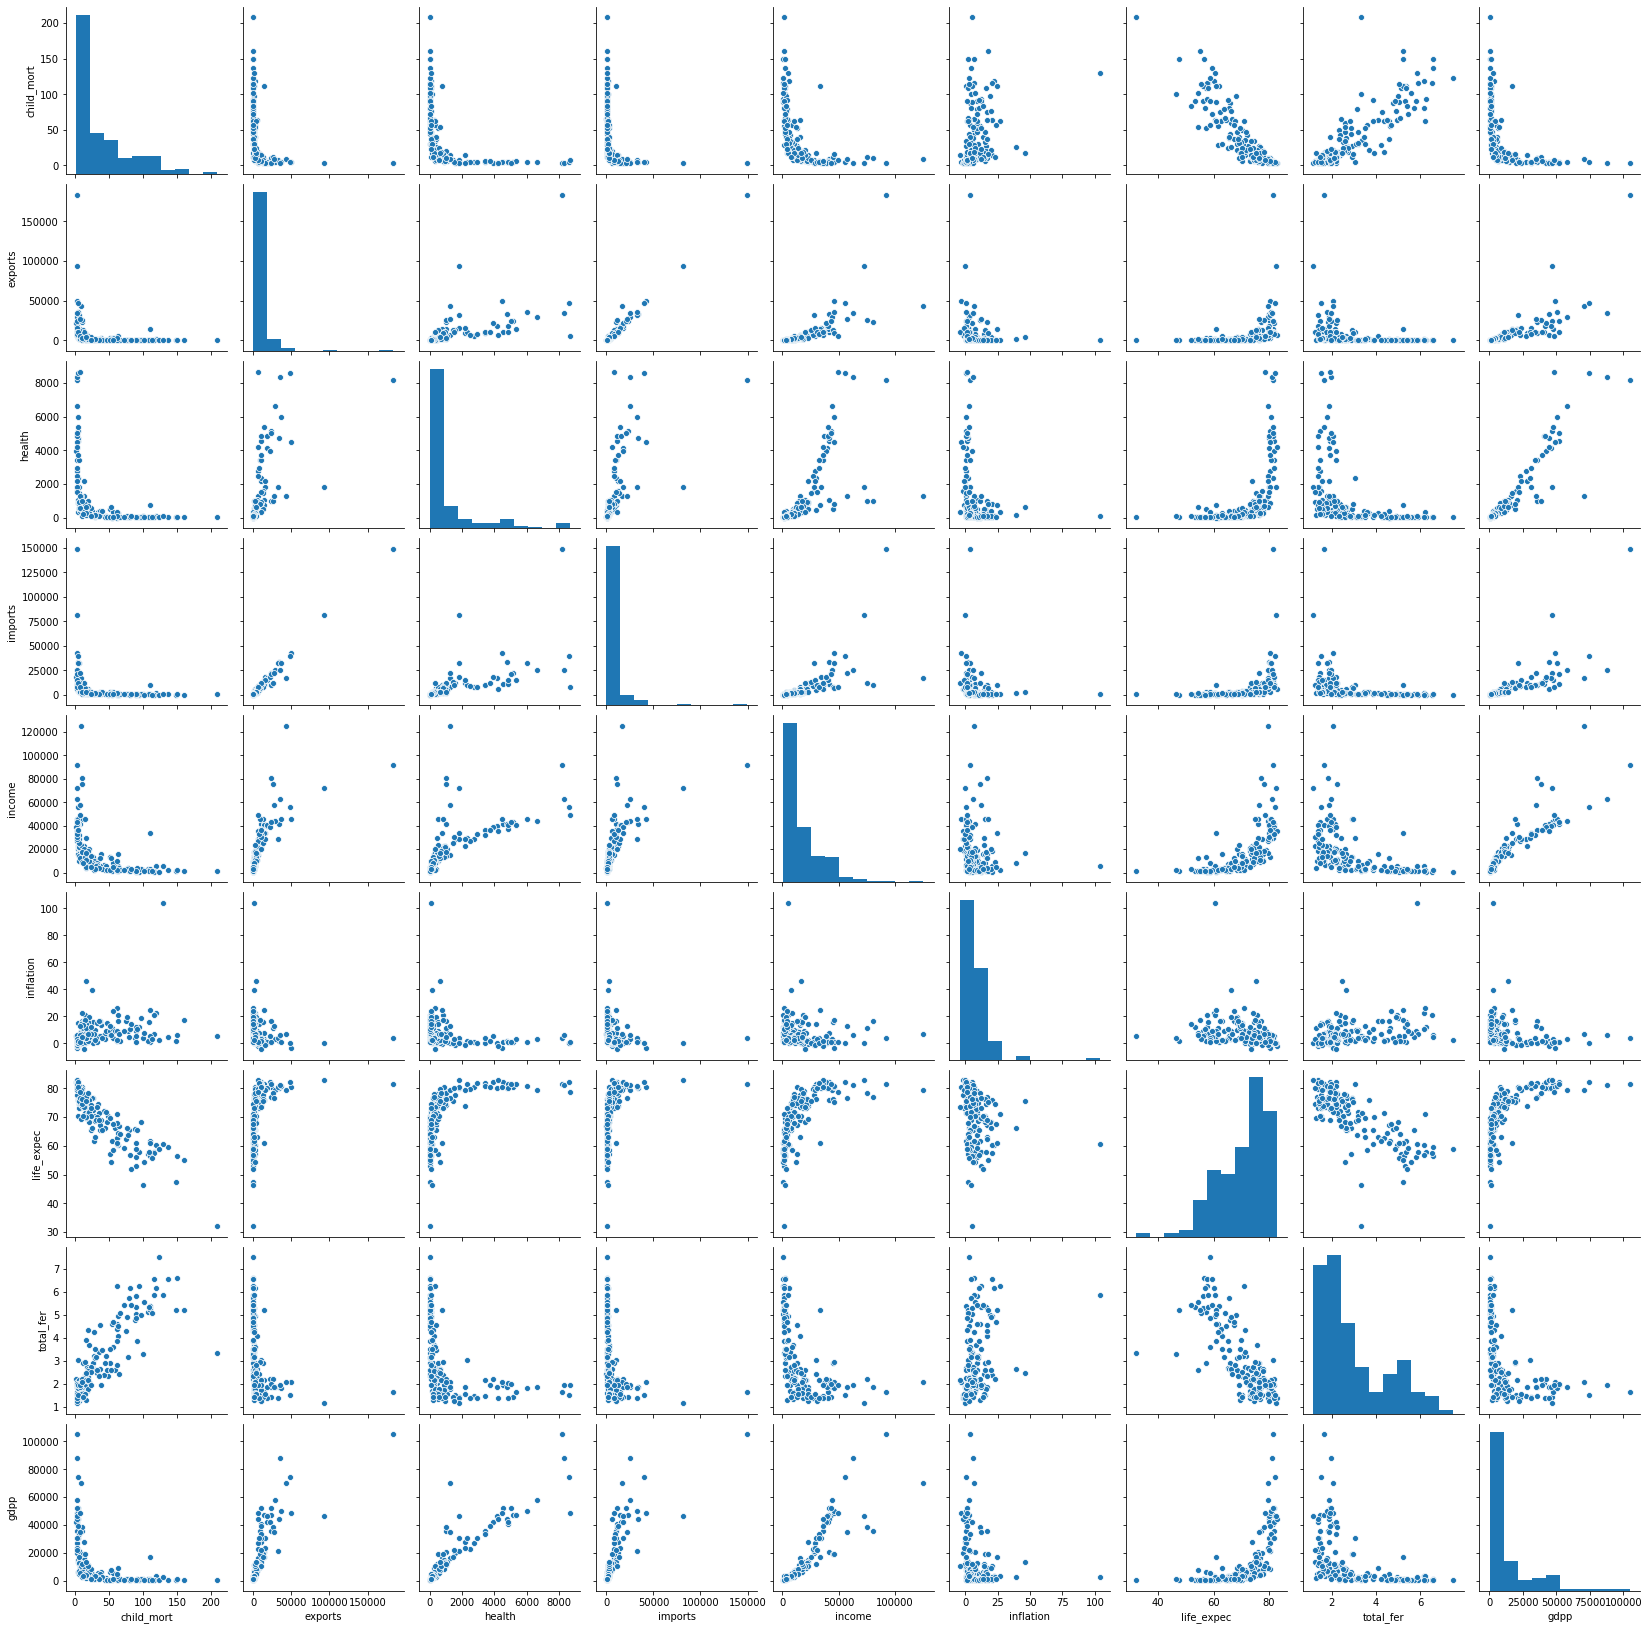

In [12]:
#Pairplots of numerical columns 
plt.figure(figsize=(20,20))
sns.pairplot(df_numerical[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']])
plt.show()

From the pairplots the following observation can be made 
- total_fer and child_mort are positively correlated, indicating that countries with higher fertility rates also have higher child moratlity rates. 
- GDPP is positively correlated with health, exports imports and income. Indicating that countries with higher gdpp have higher exports, expenditure in health facilities, imports and income.

In [13]:
# To understand the correlations better we use a correlation matrix and visulaise the same using a heatmap. 
correlation= df_numerical.corr() 
correlation

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


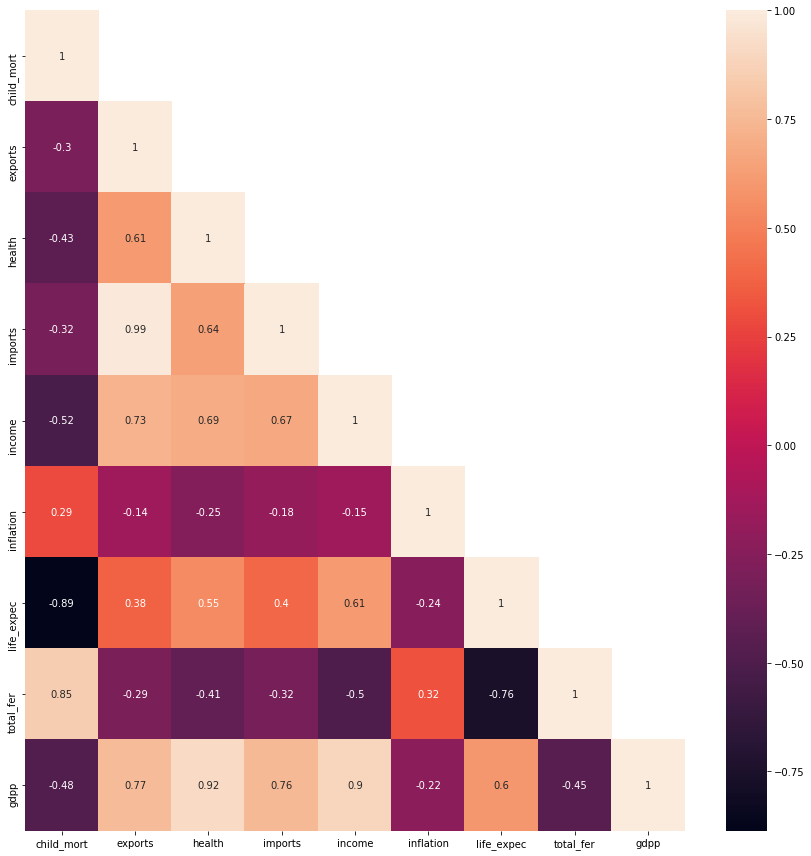

In [14]:
# Visualising using heatmap 
mask = np.array(correlation)
mask[np.tril_indices_from(mask)]=False
plt.figure(figsize=(12,12))
sns.heatmap(correlation,mask=mask,annot=True);
plt.tight_layout()

The observations from the pairplots can be verified with the heatmap given above. Further it can be seen that income and health are very highly corrlated with gdpp

## 3. Hopkins Statistics

In [15]:
# We perform the hopkins statistics test for checking whether the given data is suitable for clustering 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [16]:
hopkins(df_numerical)

0.9424572705605463

Thus the data is suitable for clustering as repeating the hopkins statistic for over 10 times gave a value greater than 80% each time.

## 4. Scaling 

In [17]:
# Scaling the variables using the standardisation method.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df_numerical)
df1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [18]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## 5. K-Means Clustering

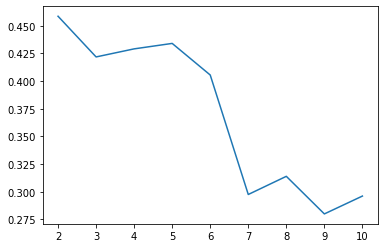

In [19]:
# Choosing the best value of k using silhouette method and ssd elbow curve respectively.
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

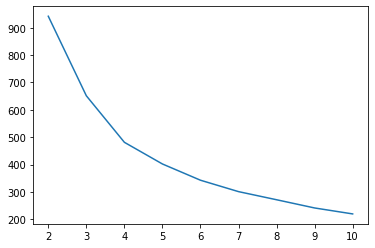

In [20]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

We finally go with k value of 3 from the observation of two plots above

In [21]:
# Performing the k-means clustering 
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [22]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [23]:
# Adding the cluster id's to original dataframe 
df['cluster_id'] = kmean.labels_ 
df.head(15)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,2
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,2
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,1
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,2


In [24]:
# Checking how many countrties are there in each cluster 
df.cluster_id.value_counts()

2    91
0    48
1    28
Name: cluster_id, dtype: int64

Looks like fairly good clusters have been formed 

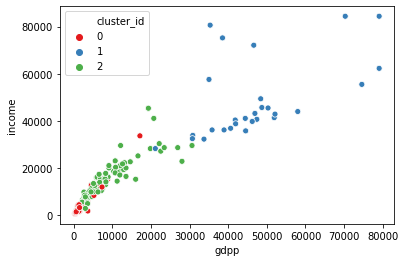

In [25]:
# Visualising the clusters 
sns.scatterplot(x='gdpp',y='income', hue='cluster_id',data=df, palette= 'Set1') 
plt.show()

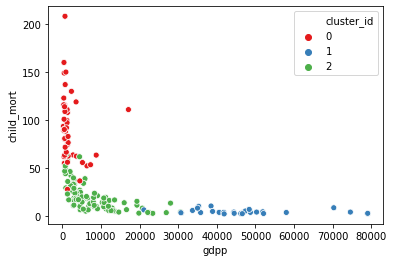

In [26]:
sns.scatterplot(x='gdpp',y='child_mort', hue='cluster_id',data=df, palette= 'Set1') 
plt.show()

From the visualisations we can see that good clusters have been formed.

In [27]:
# Cluster Profiling 
# As per the requirements of the problem statment we do the profiling based on 3 columns i.e. child_mort,gdpp and income 
df[['child_mort', 'gdpp', 'income','cluster_id']].groupby('cluster_id').mean()

,child_mort,gdpp,income
cluster_id,,,
0,91.610417,1909.208333,3897.354167
1,5.046429,46877.714286,48466.000000
2,20.357143,7979.912088,13968.021978


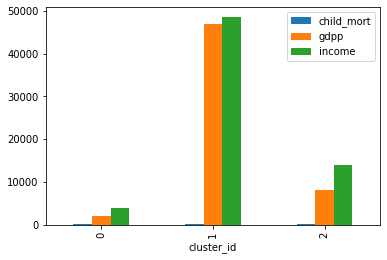

In [28]:
# Plotting bar chart for better understanding 
df[['child_mort', 'gdpp', 'income','cluster_id']].groupby('cluster_id').mean().plot(kind='bar') 

plt.show()

In [29]:
# The countries that need aid are the ones with low gdp, low income and high child mortality rates, this seems to captured in cluster 0. 
# So we take them here 
country_list1 = df[df['cluster_id']==0]
country_list1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [30]:
# Finding the top 10 countries that need aid 
country_list1.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0


## 6. Hierarchical Clustering 

In [31]:
# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 
from scipy.cluster.hierarchy import cut_tree 


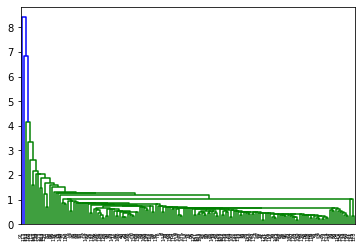

In [32]:
# Hierarchical clustering using single linkage 
mergings= linkage(df1, method="single", metric="euclidean") 
dendrogram(mergings) 
plt.show()

Thus we see that single linkage doesn't produce a good enough result for us to analyse the clusters, thus we need to use complete linkage method and then analyse the clusters.

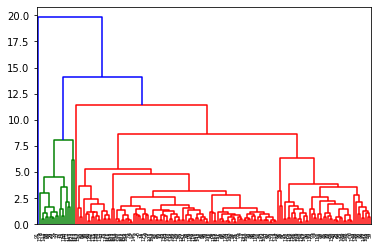

In [33]:
# Hierachical clustering using complete linkage 
mergings= linkage(df1, method="complete", metric="euclidean") 
dendrogram(mergings) 
plt.show()

In [34]:
# Cutting to get 3 clusters 
cut_tree(mergings,n_clusters=3) 
cluster_labels=cut_tree(mergings,n_clusters=3).reshape(-1,)

In [35]:
# Assigning cluster labels. 
df['cluster_labels']=cluster_labels 
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [36]:
#Checking how many countries are there in each cluster
df.cluster_labels.value_counts()

0    148
1     18
2      1
Name: cluster_labels, dtype: int64

The cluster with label 2 has just one country, to understand this better let's check which country is in it.

In [37]:
df[df['cluster_labels']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
91,Luxembourg,2.8,64794.26,8158.5,55371.39,84374.0,3.62,81.3,1.63,79088.0,1,2


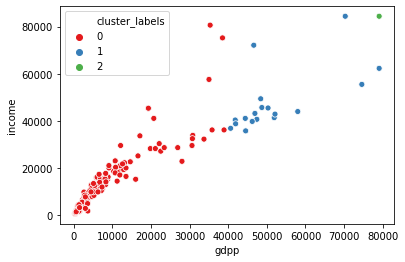

In [38]:
# Visualising the clusters 
sns.scatterplot(x='gdpp',y='income', hue='cluster_labels',data=df, palette= 'Set1') 
plt.show()

It can be seen that the country in cluster 2 belongs to high income and high gdpp group, hence we can ignore that cluster as our objective is to find the poorer countries that need aid.

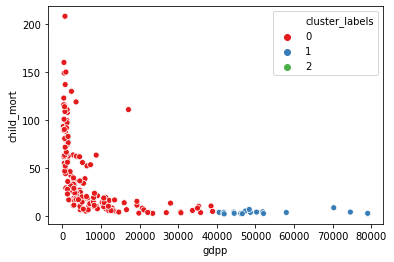

In [39]:
sns.scatterplot(x='gdpp',y='child_mort', hue='cluster_labels',data=df, palette= 'Set1') 
plt.show()

In [40]:
# Cluster Profiling 
# As per the requirements of the problem statment we do the profiling based on 3 columns i.e. child_mort,gdpp and income 
df[['child_mort', 'gdpp', 'income','cluster_labels']].groupby('cluster_labels').mean()

,child_mort,gdpp,income
cluster_labels,,,
0,42.630405,7551.445946,12641.641892
1,4.388889,51871.555556,47770.777778
2,2.800000,79088.000000,84374.000000


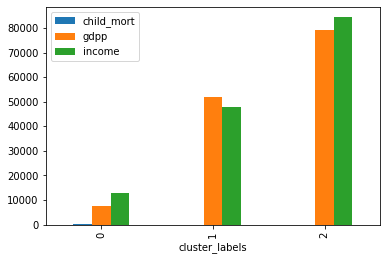

In [41]:
# Plotting a bar chart for better understanding
df[['child_mort', 'gdpp', 'income','cluster_labels']].groupby('cluster_labels').mean().plot(kind='bar')

Clearly the cluster with label 0 is the one that includes countries that need aid because of its higher child mortality rate, and lower income and gdpp

In [42]:
# The countries that need aid are the ones with low gdp, low income and high child mortality rates, this seems to captured in cluster 0. 
# So we take them here 
country_list2 = df[df['cluster_labels']==0]
country_list2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,2,0


In [43]:
# Finding the top 10 countries that need aid 
country_list2.sort_values(by = ['gdpp', 'income', 'child_mort'], ascending = [True, True,False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,0,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,0,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,0,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,0,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,0,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,0,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446.0,0,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459.0,0,0
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482.0,0,0


## 7. Conclusion

Thus we can see that the same list of countries that need aid are obtained from both clustering techniques. 
Thus, from this we can conclude that the top 10 countries that need aid from HELP International are, 
1. Burundi 
2. Liberia 
3. Congo,Dem.Rep 
4. Niger 
5. Sierra Leone 
6. Madagascar 
7. Mozambique 
8. Central African Republic 
9. Malawi 
10. Eritrea